In [189]:
data = pd.read_csv('/Users/dmi.kim/Downloads/student_monnitoring_data.csv')

In [208]:
data['Risk Level'].value_counts()

High      8380
Medium    3349
Low       3271
Name: Risk Level, dtype: int64

0           Low
1        Medium
2          High
3           Low
4          High
          ...  
14995       Low
14996      High
14997      High
14998    Medium
14999      High
Name: Risk Level, Length: 15000, dtype: object

In [191]:
data.head(5)

X = data.drop(['Risk Level'], axis=1)
y = data['Risk Level']

In [234]:
y = data['Risk Level']
y

0           Low
1        Medium
2          High
3           Low
4          High
          ...  
14995       Low
14996      High
14997      High
14998    Medium
14999      High
Name: Risk Level, Length: 15000, dtype: object

In [235]:
y = y.apply(lambda x: 1 if x == 'High' else 0)

In [241]:
X

,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,weekends,monday,tuesday,wednesday,thurday,friday,saturday,sunday,less_than_6,more_than_8,more_between_8_6,more_than_5,less_than_3,start_before_9,finish_after_13,Attendance Status_Late,Attendance Status_Present
0,0.92,7.6,6,6,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0
1,1.17,6.0,6,2,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0
2,4.56,6.3,4,8,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0
3,3.07,9.0,2,10,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0
4,3.93,7.4,9,4,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.30,7.2,7,10,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,1,0
14996,1.07,7.9,4,6,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0
14997,1.67,7.2,3,5,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
14998,0.99,7.2,10,9,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from typing import Any, List, Dict, Tuple
from sklearn.metrics import f1_score, accuracy_score

In [121]:
X['Date'].head()

0    2024-12-01
1    2024-12-02
2    2024-12-03
3    2024-12-04
4    2024-12-05
Name: Date, dtype: object

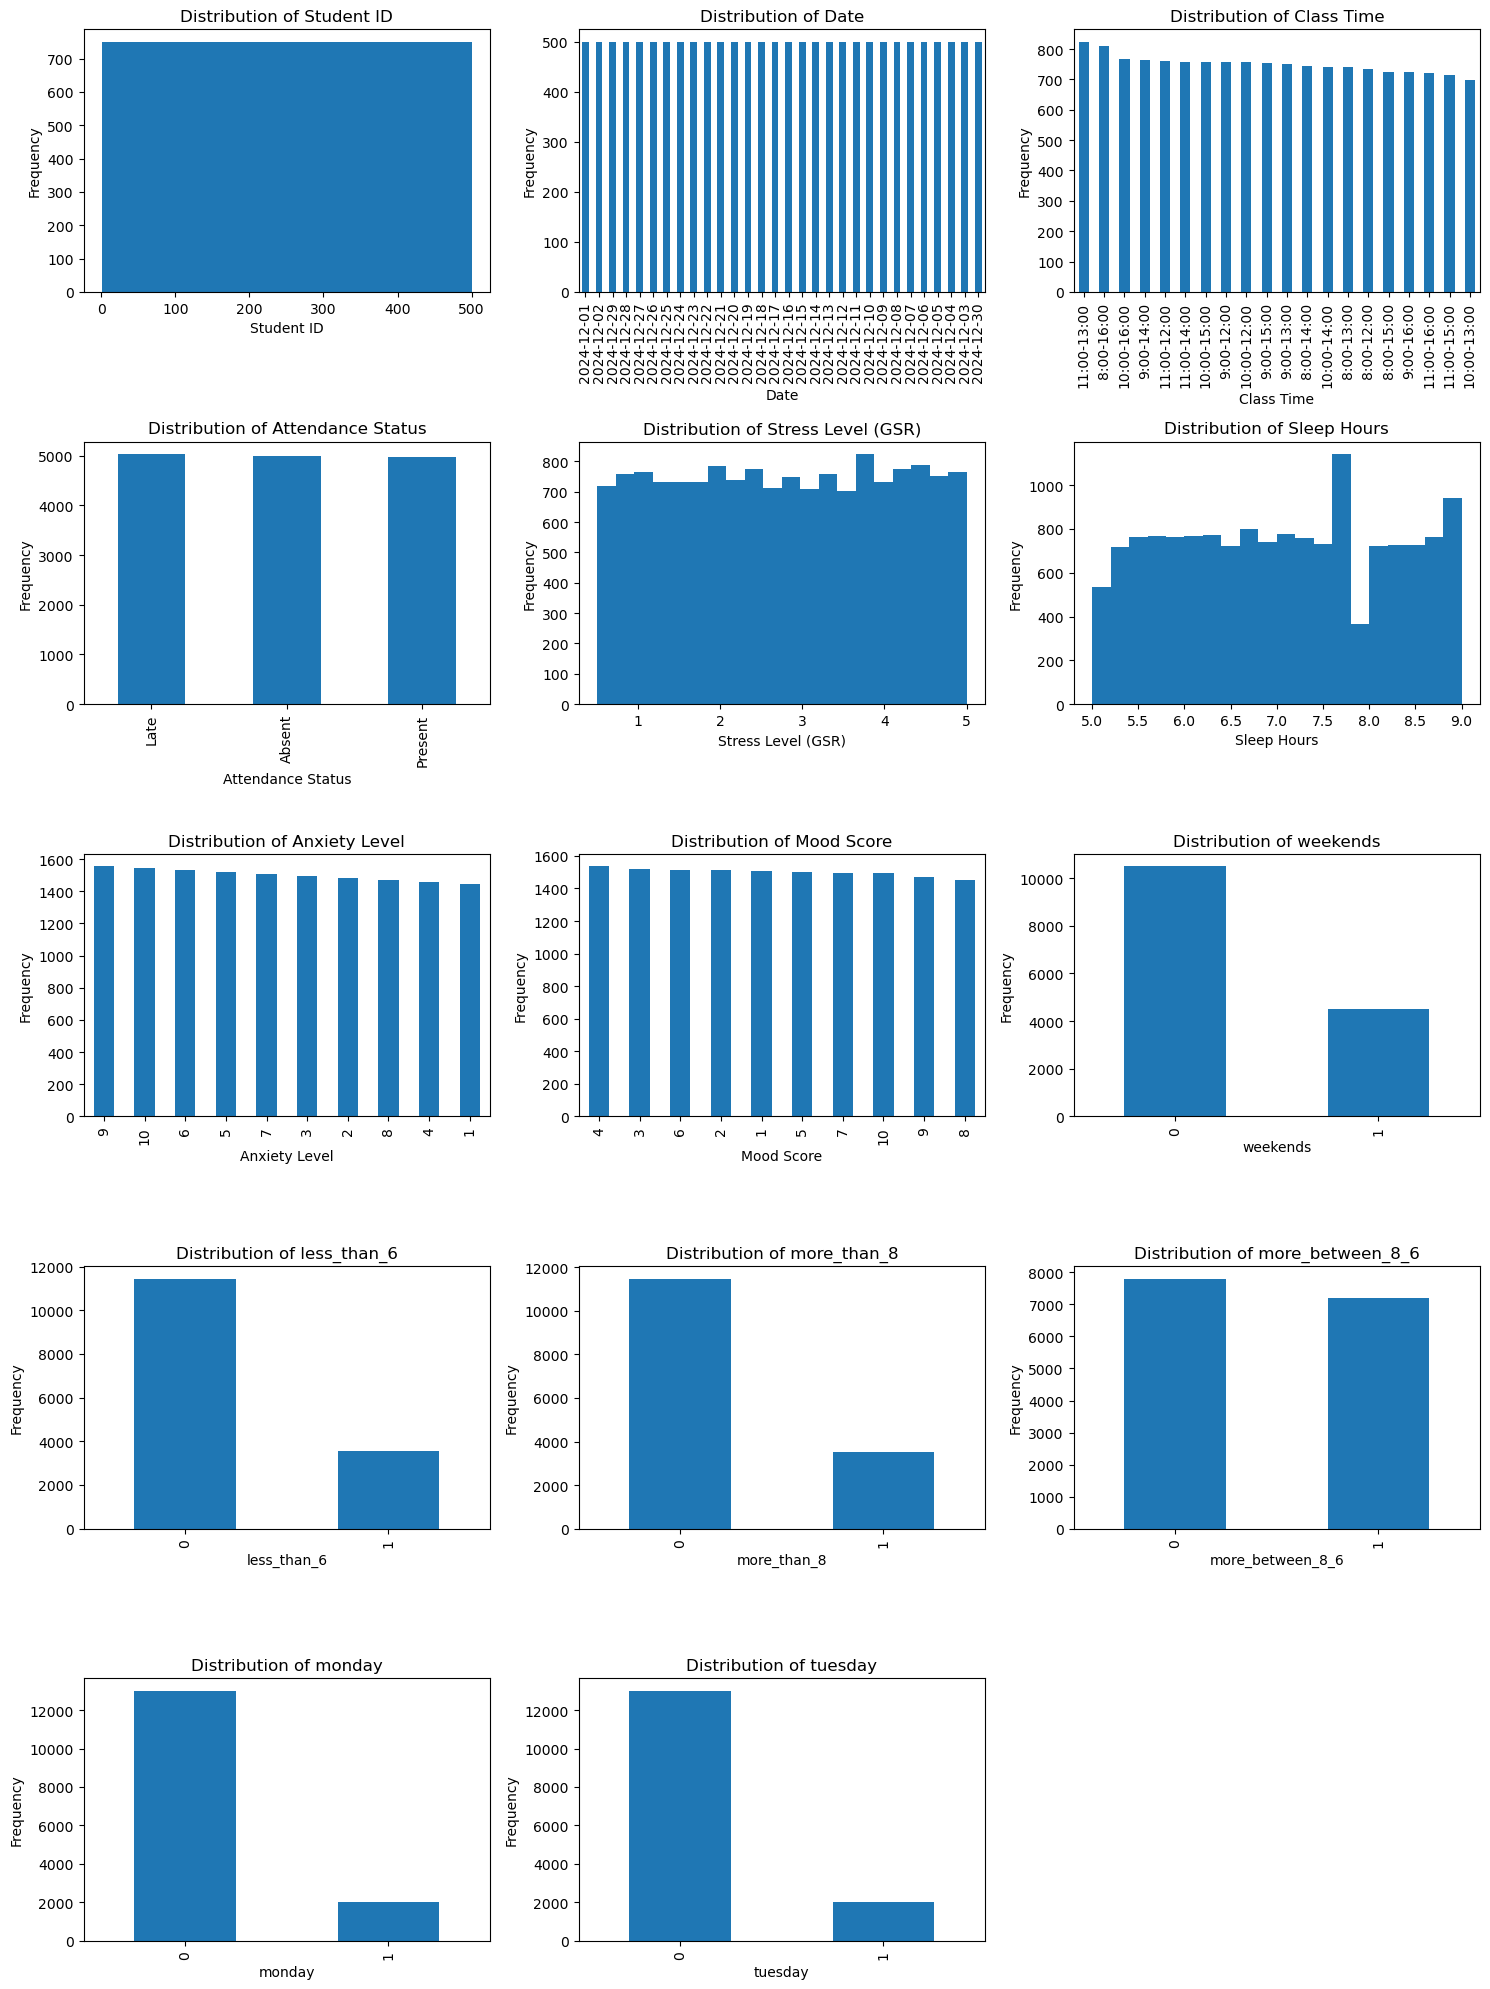

In [122]:
num_columns = len(X.columns)
cols = 3  # Number of columns in the grid (adjust as needed)
rows = math.ceil(num_columns / cols)

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))  # Adjust figure size as needed
axes = axes.flatten()  # Flatten to easily iterate over axes

for i, column in enumerate(X.columns):
    ax = axes[i]
    if X[column].dtype == 'object' or len(X[column].unique()) < 20:
        # For categorical or discrete features, use a bar plot
        X[column].value_counts().plot(kind='bar', ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
    else:
        # For continuous features, use a histogram
        X[column].plot(kind='hist', bins=20, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout for readability
plt.show()

In [46]:
data['Date'].value_counts()

2024-12-01    500
2024-12-02    500
2024-12-29    500
2024-12-28    500
2024-12-27    500
2024-12-26    500
2024-12-25    500
2024-12-24    500
2024-12-23    500
2024-12-22    500
2024-12-21    500
2024-12-20    500
2024-12-19    500
2024-12-18    500
2024-12-17    500
2024-12-16    500
2024-12-15    500
2024-12-14    500
2024-12-13    500
2024-12-12    500
2024-12-11    500
2024-12-10    500
2024-12-09    500
2024-12-08    500
2024-12-07    500
2024-12-06    500
2024-12-05    500
2024-12-04    500
2024-12-03    500
2024-12-30    500
Name: Date, dtype: int64

In [54]:
data['Class Time'].value_counts()

11:00-13:00    824
8:00-16:00     809
10:00-16:00    767
9:00-14:00     765
11:00-12:00    762
11:00-14:00    759
10:00-15:00    758
9:00-12:00     757
10:00-12:00    756
9:00-15:00     753
9:00-13:00     750
8:00-14:00     744
10:00-14:00    741
8:00-13:00     741
8:00-12:00     736
8:00-15:00     723
9:00-16:00     723
11:00-16:00    720
11:00-15:00    714
10:00-13:00    698
Name: Class Time, dtype: int64

In [194]:
X['weekends'] = X['Date'].apply(lambda x: 1 if x in ('2024-12-01','2024-12-07','2024-12-08','2024-12-14','2024-12-15','2024-12-12','2024-12-22','2024-12-28','2024-12-29' ) else 0)
X['monday'] = X['Date'].apply(lambda x: 1 if x in ('2024-12-02', '2024-12-09', '2024-12-16', '2024-12-23', '2024-12-30') else 0)
X['tuesday'] = X['Date'].apply(lambda x: 1 if x in ('2024-12-03', '2024-12-10', '2024-12-17', '2024-12-24', '2024-12-21') else 0)
X['wednesday'] = X['Date'].apply(lambda x: 1 if x in ('2024-12-04', '2024-12-11', '2024-12-18', '2024-12-25') else 0)
X['thurday'] = X['Date'].apply(lambda x: 1 if x in ('2024-12-05', '2024-12-12', '2024-12-19', '2024-12-26') else 0)
X['friday'] = X['Date'].apply(lambda x: 1 if x in ('2024-12-06', '2024-12-13', '2024-12-20', '2024-12-27') else 0)
X['saturday'] = X['Date'].apply(lambda x: 1 if x in ('2024-12-07', '2024-12-14', '2024-12-21', '2024-12-28') else 0)
X['sunday'] = X['Date'].apply(lambda x: 1 if x in ('2024-12-08', '2024-12-15', '2024-12-22', '2024-12-29') else 0)
X['less_than_6'] = X['Sleep Hours'].apply(lambda x: 1 if x < 6 else 0)
X['more_than_8'] = X['Sleep Hours'].apply(lambda x: 1 if x > 8 else 0)
X['more_between_8_6'] = X['Sleep Hours'].apply(lambda x: 1 if x > 6 and  x < 8 else 0)
X = X.drop(['Date'], axis=1)
X


,Student ID,Class Time,Attendance Status,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,weekends,monday,tuesday,wednesday,thurday,friday,saturday,sunday,less_than_6,more_than_8,more_between_8_6
0,1,9:00-15:00,Late,0.92,7.6,6,6,1,0,0,0,0,0,0,0,0,0,1
1,1,8:00-16:00,Late,1.17,6.0,6,2,0,1,0,0,0,0,0,0,0,0,0
2,1,11:00-14:00,Late,4.56,6.3,4,8,0,0,1,0,0,0,0,0,0,0,1
3,1,11:00-16:00,Late,3.07,9.0,2,10,0,0,0,1,0,0,0,0,0,1,0
4,1,9:00-13:00,Absent,3.93,7.4,9,4,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,500,9:00-16:00,Late,1.30,7.2,7,10,0,0,0,0,1,0,0,0,0,0,1
14996,500,9:00-15:00,Absent,1.07,7.9,4,6,0,0,0,0,0,1,0,0,0,0,1
14997,500,11:00-14:00,Absent,1.67,7.2,3,5,1,0,0,0,0,0,1,0,0,0,1
14998,500,11:00-14:00,Late,0.99,7.2,10,9,1,0,0,0,0,0,0,1,0,0,1


In [195]:
import datetime

def time_diff_to_binary(time_interval, k):
    start_time, end_time = time_interval.split('-')
    start = datetime.datetime.strptime(start_time, "%H:%M").time()
    end = datetime.datetime.strptime(end_time, "%H:%M").time()

    start_datetime = datetime.datetime.combine(datetime.date.today(), start)
    end_datetime = datetime.datetime.combine(datetime.date.today(), end)

    time_diff = end_datetime - start_datetime
    hours_diff = time_diff.seconds // 3600

    return 1 if hours_diff > k else 0


def is_before_9am(time_interval):
   
    start_time, _ = time_interval.split('-')  # Нам нужно только начальное время
    time_obj = datetime.datetime.strptime(start_time, "%H:%M").time()
    nine_am = datetime.time(9, 1)
    return 1 if time_obj < nine_am else 0

def is_end_time_after_13(time_interval):
 
    _, end_time_str = time_interval.split('-')
    end_time = datetime.datetime.strptime(end_time_str, "%H:%M").time()
    threshold_time = datetime.time(13, 0)  # 13:00
    return 1 if end_time > threshold_time else 0


X['more_than_5'] = X['Class Time'].apply(lambda x: 1 if time_diff_to_binary(x, 5)  else 0)
X['less_than_3'] = X['Class Time'].apply(lambda x: 0 if time_diff_to_binary(x, 3)  else 1)
X['start_before_9'] = X['Class Time'].apply(lambda x: 1 if is_before_9am(x)  else 0)
X['finish_after_13'] = X['Class Time'].apply(lambda x: 1 if is_end_time_after_13(x)  else 0)
X = X.drop(['Class Time'], axis=1)
X = X.drop(['Student ID'], axis=1)



In [245]:
# def percentiles_to_binary(data):
#     data_array = np.array(data)
#     percentiles = np.percentile(data_array['Stress Level (GSR)'].astype('float64'), [25, 50, 75, 100])

#     df = pd.DataFrame({'Stress Level (GSR)': data_array})
#     df['p25'] = (df['Stress Level (GSR)'].astype('float64') <= percentiles[0]).astype(int)
#     df['p50'] = (df['Stress Level (GSR)'].astype('float64') <= percentiles[1]).astype(int)
#     df['p75'] = (df['Stress Level (GSR)'].astype('float64') <= percentiles[2]).astype(int)
#     df['p100'] = (df['Stress Level (GSR)'].astype('float64') <= percentiles[3]).astype(int)

#     return df

# percentiles_to_binary(data)
# data

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [247]:
X = X.drop(['Stress Level (GSR)', 'Sleep Hours', 'Anxiety Level', 'Mood Score'], axis=1)
X

,weekends,monday,tuesday,wednesday,thurday,friday,saturday,sunday,less_than_6,more_than_8,more_between_8_6,more_than_5,less_than_3,start_before_9,finish_after_13,Attendance Status_Late,Attendance Status_Present
0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0
1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0
2,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0
4,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,1,0
14996,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0
14997,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
14998,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0


In [93]:
y.value_counts()

High      8380
Medium    3349
Low       3271
Name: Risk Level, dtype: int64

In [25]:
y.value_counts() / len(y)

High      0.558667
Medium    0.223267
Low       0.218067
Name: Risk Level, dtype: float64

In [197]:
neseccary_columns = X.dtypes[X.dtypes == 'object']#теперь делаем one hot encoding для категориальных фичей 
# neseccary_columns
X = pd.get_dummies(X, columns = neseccary_columns.index, drop_first = True)
X

,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,weekends,monday,tuesday,wednesday,thurday,friday,saturday,sunday,less_than_6,more_than_8,more_between_8_6,more_than_5,less_than_3,start_before_9,finish_after_13,Attendance Status_Late,Attendance Status_Present
0,0.92,7.6,6,6,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0
1,1.17,6.0,6,2,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0
2,4.56,6.3,4,8,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0
3,3.07,9.0,2,10,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0
4,3.93,7.4,9,4,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.30,7.2,7,10,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,1,0
14996,1.07,7.9,4,6,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0
14997,1.67,7.2,3,5,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
14998,0.99,7.2,10,9,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0


In [198]:
import matplotlib.pyplot as plt
correlations = data.corr(method='spearman')
correlations
fig, ax = plt.subplots(figsize=(100, 100))
sns.heatmap(correlations, annot = True,fmt='.1f')

<AxesSubplot:>

In [155]:
correlations

,Student ID,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,weekends,less_than_6,more_than_8,more_between_8_6,monday,tuesday,wednesday,thurday,friday,saturday,sunday,more_than_5,less_than_3,start_before_9,start_after_9,finish_after_13,Attendance Status_Late,Attendance Status_Present,Risk Level_Low,Risk Level_Medium
Student ID,1.000000,-0.010277,-0.007279,-0.003542,0.006469,0.000000,0.008122,-0.013441,0.001604,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.002871,-0.003222,0.006607,0.008449,0.008449,-0.001329,-0.000648,0.004660,0.006490
Stress Level (GSR),-0.010277,1.000000,0.003511,0.013127,-0.006282,0.007662,0.005770,-0.000835,-0.004028,-0.007903,0.006755,-0.003790,-0.005998,0.006959,-0.001934,0.001752,0.002911,0.009196,-0.003094,0.008297,0.008297,0.007045,0.002977,-0.304985,-0.307165
Sleep Hours,-0.007279,0.003511,1.000000,-0.005894,-0.014269,-0.009570,-0.736268,0.733963,0.005654,0.010244,0.011185,-0.001884,-0.011055,-0.004273,0.010339,-0.009313,-0.011068,0.008335,0.003013,-0.017228,-0.017228,-0.013385,0.006029,-0.007185,-0.003214
Anxiety Level,-0.003542,0.013127,-0.005894,1.000000,-0.012068,-0.007721,0.008700,0.006099,-0.012280,-0.005409,0.001424,0.008400,-0.003782,0.011420,-0.012153,0.001148,-0.002036,-0.006960,0.011727,-0.005528,-0.005528,-0.010094,-0.002147,-0.293981,0.267775
Mood Score,0.006469,-0.006282,-0.014269,-0.012068,1.000000,-0.007898,0.003073,-0.013453,0.004761,0.009594,-0.013034,0.002988,0.007067,0.002759,-0.001701,-0.011007,-0.008660,0.004745,-0.007246,-0.004497,-0.004497,0.005562,0.005749,0.273703,-0.270494
weekends,0.000000,0.007662,-0.009570,-0.007721,-0.007898,1.000000,0.007052,-0.008860,-0.000262,-0.292770,-0.292770,-0.256776,-0.042796,-0.256776,0.385164,0.599145,0.000095,0.009554,-0.007361,-0.002611,-0.002611,-0.000185,-0.003030,0.001304,-0.011773
less_than_6,0.008122,0.005770,-0.736268,0.008700,0.003073,0.007052,1.000000,-0.307985,-0.534274,-0.006455,-0.006876,0.001815,0.014737,-0.006030,-0.010184,0.007815,0.011320,-0.017619,0.007770,0.016282,0.016282,0.003577,0.001459,-0.002546,0.008608
more_than_8,-0.013441,-0.000835,0.733963,0.006099,-0.013453,-0.008860,-0.307985,1.000000,-0.531118,0.011824,0.008023,0.003333,-0.000370,-0.016574,0.010740,-0.011018,-0.002831,0.005843,0.003703,-0.010907,-0.010907,-0.015499,0.006678,-0.009803,0.009068
more_between_8_6,0.001604,-0.004028,0.005654,-0.012280,0.004761,-0.000262,-0.534274,-0.531118,1.000000,-0.006386,-0.002447,-0.008663,-0.008270,0.024313,-0.001989,0.005077,-0.003784,0.011969,-0.009069,-0.003618,-0.003618,0.010171,-0.010028,0.001437,-0.014086
monday,0.000000,-0.007903,0.010244,-0.005409,0.009594,-0.292770,-0.006455,0.011824,-0.006386,1.000000,-0.200000,-0.175412,-0.175412,-0.175412,-0.175412,-0.175412,0.008513,-0.010632,0.014609,0.005839,0.005839,0.006188,-0.009376,0.004693,-0.004367


# Binarization is Complete, Re-split:

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [249]:
y.iloc[0]

0

# Lazy FCA baseline:

In [250]:
class LazyClassifierFCA:
    def __init__(self):
        self.X_train = None
        self.y_train = None

    def fit(self, X_train: pd.DataFrame, y_train: pd.Series) -> None:
        self.X_train = X_train
        self.y_train = y_train
        
    def classify_sample(self, sample: pd.Series) -> Any:
        # Split X_train into positive and negative classes
        X_train_positive = self.X_train[y_train == 1]
        X_train_negative = self.X_train[y_train == 0]
        
        positive_classifiers = 0
        negative_classifiers = 0
        
        # Function to check if intersection with a train sample is a positive classifier
        def is_positive_classifier(intersection):
            # Find samples in X_train_positive that contain the intersection
            num_positive = ((X_train_positive | ~intersection) == True).all(axis=1).sum()
            num_negative = ((X_train_negative | ~intersection) == True).all(axis=1).sum()
            return num_negative == 0 and num_positive > 1
        
        # Function to check if intersection is a negative classifier
        def is_negative_classifier(intersection):
            # Find samples in X_train_negative that contain the intersection
            num_positive = ((X_train_positive | ~intersection) == True).all(axis=1).sum()
            num_negative = ((X_train_negative | ~intersection) == True).all(axis=1).sum()
            return num_positive == 0 and num_negative > 1
        
        # Check for positive classifiers by intersecting sample with each positive object
        for _, pos_sample in X_train_positive.iterrows():
            intersection = sample & pos_sample
            if is_positive_classifier(intersection):
                positive_classifiers += 1

        # Check for negative classifiers by intersecting sample with each negative object
        for _, neg_sample in X_train_negative.iterrows():
            intersection = sample & neg_sample
            if is_negative_classifier(intersection):
                negative_classifiers += 1

        # Determine the class based on the number of classifiers
        if positive_classifiers > negative_classifiers:
            print(f"sample {sample.name} is classified as 1, {positive_classifiers=}, {negative_classifiers=}")
            return 1  # Predict positive
            
        elif negative_classifiers > positive_classifiers:
            print(f"sample {sample.name} is classified as 0, {positive_classifiers=}, {negative_classifiers=}")
            return 0  # Predict negative

        else:
            # If equal, you can decide on a rule, like defaulting to 0 or 1, or returning 'undetermined'
            print(f"sample {sample.name} is classified as 1, default, {positive_classifiers=}, {negative_classifiers=}")
        
            return 1  # or 0, depending on the choice


    def predict(self, X_test: pd.DataFrame) -> List[Any]:
        # List to store predictions for each test sample
        predictions = []
        
        # Iterate through each sample in X_test
        for _, sample in X_test.iterrows():
            # Classify the sample and append the result to predictions
            prediction = self.classify_sample(sample)
            predictions.append(prediction)
        
        return predictions

In [251]:
sample = X_test.iloc[1]
y.iloc[1]

0

In [252]:
len(X_train[y_train == 1]), len(X_train[y_train == 0])

(6704, 5296)

In [253]:
pos_X_train = X_train[y_train == 1]
neg_X_train = X_train[y_train == 0]
len(pos_X_train), len(neg_X_train)

(6704, 5296)

In [254]:
classifier = LazyClassifierFCA()
classifier.fit(X_train, y_train)

In [261]:
classifier.classify_sample(sample)

sample 6430 is classified as 1, default, positive_classifiers=0, negative_classifiers=0


1

In [ ]:
y_pred = classifier.predict(X_test)

sample 9798 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 6430 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 14270 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 6419 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 12269 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 12190 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 12134 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 7072 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 434 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 581 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 2238 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 1414 is classified as 1

sample 11536 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 14604 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 11917 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 9444 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 13689 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 7159 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 139 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 3244 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 1838 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 11623 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 8180 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 6646 is classified as

sample 6449 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 7821 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 7062 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 7313 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 13657 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 4313 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 7480 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 475 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 6238 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 2046 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 8450 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 12159 is classified as 1,

sample 4215 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 8191 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 10742 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 13987 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 9469 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 637 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 9001 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 10586 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 12000 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 2615 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 13242 is classified as 1, default, positive_classifiers=0, negative_classifiers=0
sample 13454 is classified a

In [ ]:
f1_score(y_test, y_pred), accuracy_score(y_test, y_pred)


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('TN Rate:', tn/(tn+fp))
print('NP Value:', tn/(tn+fn))
print('FP Rate:', fp/(tn+fp))
print('FD Rate:', tp/(tp+fp))


In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


f1_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_knn)



In [ ]:
tn_knn, fp_knn, fn_knn, tp_knn = confusion_matrix(y_test, y_pred_knn).ravel()
print('TN Rate:', tn_knn/(tn_knn+fp_knn))
print('NP Value:', tn_knn/(tn_knn+fn_knn))
print('FP Rate:', fp_knn/(tn_knn+fp_knn))
print('FD Rate:', tp_knn/(tp_knn+fp_knn))


In [ ]:
precision_score(y_test, y_pred_knn)

In [ ]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred_lg = lg.predict(X_test)

In [ ]:
tn_knn_lg, fp_knn_lg, fn_knn_lg, tp_knn_lg = confusion_matrix(y_test, y_pred_lg).ravel()
print('TN Rate:', tn_lg/(tn_lg+fp_lg))
print('NP Value:', tn_lg/(tn_lg+fn+lg))
print('FP Rate:', fp_lg/(tn_lg_lg))h
print('FD Rate:', tp_lg/(tp_lg+fp_lg))


In [ ]:
precision_score(y_test, y_pred_lg)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
f1_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_rf)

In [ ]:
tn_rf, fp_rf, fn_rf, tp_fr = confusion_matrix(y_test, y_pred_rf).ravel()
print('TN Rate:', tn_rf/(tn_rf+fp_rf))
print('NP Value:', tn_rf/(tn_rf+fn_rf))
print('FP Rate:', fp_rf/(tn_rf+fp_rf))
print('FD Rate:', tp_rf/(tp_rf+fp_rf))


In [ ]:
precision_score(y_test, y_pred_rf)

In [ ]:
# its looks like lazyfca is just a little bit better than other algorithms